In [1]:
!pip install datasets

In [2]:
from datasets import list_datasets
from datasets import load_dataset
import pandas as pd

In [3]:
all_datasets = list_datasets()
print(f"There area {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are {all_datasets[:10]}")

/tmp/ipykernel_48914/2007646439.py:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


There area 184938 datasets currently available on the Hub
The first 10 are ['amirveyseh/acronym_identification', 'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news', 'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar', 'legacy-datasets/allegro_reviews']


In [4]:
emotion = load_dataset("emotion")

In [5]:
emotion

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotion["train"]
train_ds 

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [9]:
emotion.set_format(type="pandas")
df = emotion["train"][:]

In [10]:
len(df)

16000

In [11]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,3


In [12]:
emotion["train"].features["label"]

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

In [13]:
emotion["train"].features["label"].int2str(0)

'sadness'

In [14]:
def label_int2str(row):
    return emotion["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)

In [15]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [16]:
import matplotlib.pyplot as plt

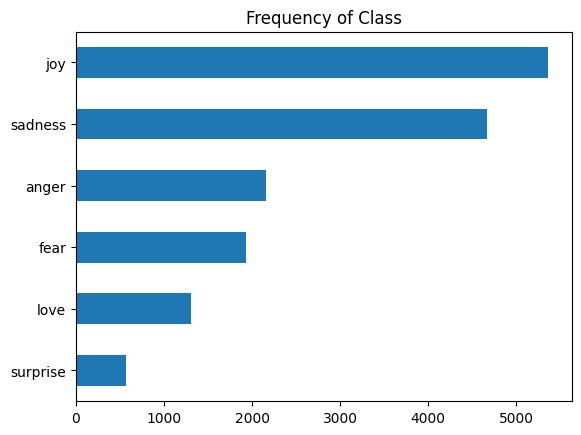

In [17]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Class")
plt.show()

In [18]:
df["Words Per Tweet"]=df["text"].str.split().apply(len)

In [19]:
df["Words Per Tweet"]

0         4
1        21
2        10
3        18
4         4
         ..
15995    24
15996    20
15997     6
15998    14
15999    15
Name: Words Per Tweet, Length: 16000, dtype: int64

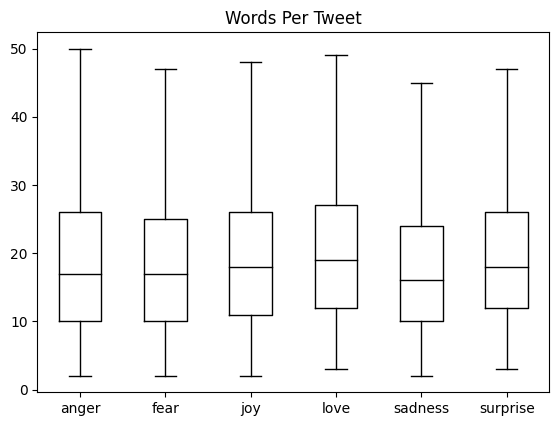

In [20]:
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [21]:
emotion.reset_format()

In [22]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [23]:
set_token = set(tokenized_text)
set_token

{' ',
 '.',
 'L',
 'N',
 'P',
 'T',
 'a',
 'c',
 'e',
 'f',
 'g',
 'i',
 'k',
 'n',
 'o',
 'r',
 's',
 't',
 'x',
 'z'}

In [24]:
sorted_token = sorted(set_token)
sorted_token

[' ',
 '.',
 'L',
 'N',
 'P',
 'T',
 'a',
 'c',
 'e',
 'f',
 'g',
 'i',
 'k',
 'n',
 'o',
 'r',
 's',
 't',
 'x',
 'z']

In [25]:
# for idx, ch in enumerate(sorted_token):
#     token2idx[ch] = idx
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [26]:
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [27]:
input_ids=[]
for token in tokenized_text:
    input_ids.append(token2idx[token])
    
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [28]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [29]:
categorival_df = pd.DataFrame({"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorival_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [30]:
pd.get_dummies(categorival_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [31]:
import torch
import torch.nn.functional as F


In [32]:
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [33]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [34]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [35]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [36]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [37]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [38]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [39]:
print(tokenize(emotion["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [40]:
emotion_encode = emotion.map(tokenize, batched=True, batch_size=None)

In [41]:
print(emotion_encode["test"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [42]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [43]:
text = "this is a pen"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")
print(inputs)
print(inputs.items())

Input tensor shape: torch.Size([1, 6])
{'input_ids': tensor([[ 101, 2023, 2003, 1037, 7279,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}
dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 7279,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])


In [44]:
inputs={k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs=model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1518, -0.0989,  0.0727,  ..., -0.1131,  0.1501,  0.4252],
         [-0.2437, -0.1121, -0.0123,  ..., -0.3360,  0.5245,  0.2296],
         [-0.2118, -0.1403,  0.1992,  ..., -0.1057,  0.1346,  0.7238],
         [-0.1595,  0.1440,  0.1631,  ..., -0.1523, -0.0130,  0.6814],
         [ 0.4231, -0.1841, -0.1753,  ...,  0.0920,  0.1916, -0.0077],
         [ 0.9091,  0.2021, -0.4842,  ...,  0.0796, -0.6812, -0.2442]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [45]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [46]:
print(outputs.last_hidden_state[:,0])

tensor([[-1.5177e-01, -9.8937e-02,  7.2729e-02, -1.5466e-01, -6.6651e-02,
         -1.1186e-01,  7.3098e-02,  2.8629e-01, -1.4848e-01, -2.5586e-01,
         -4.9930e-02, -6.0142e-02, -7.2217e-02,  1.5626e-01,  8.9058e-02,
          7.2140e-02, -1.1504e-01,  1.7087e-01,  1.9846e-01, -8.5120e-02,
         -9.9004e-02, -1.5912e-01, -6.8734e-02, -2.3324e-01,  1.2647e-01,
          5.9998e-04, -6.3197e-04, -1.3481e-01,  5.4374e-02,  5.5455e-02,
         -3.0597e-03,  7.9388e-02, -7.2973e-02, -4.0065e-02,  7.3409e-02,
         -1.0037e-01,  6.3714e-02, -1.7649e-02,  5.3052e-03, -6.3412e-02,
         -7.4271e-02, -2.8493e-02,  2.3214e-01, -5.7911e-02, -7.0728e-02,
         -1.3951e-01, -1.9123e+00,  7.8922e-02, -1.1143e-01, -1.5208e-01,
         -3.4980e-02,  2.6517e-02,  1.3418e-01,  3.3213e-01,  1.8552e-01,
          2.2670e-01, -2.3862e-01,  3.6337e-01, -7.1936e-02, -5.1201e-02,
          1.6661e-01,  5.5676e-03, -4.1907e-02,  1.6180e-01, -1.5686e-02,
          2.0627e-01,  1.3818e-02,  8.

In [47]:
def extract_hidden_states(batch):
    inputs={k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [48]:
emotion_encode.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [49]:
emotion_hidden = emotion_encode.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [50]:
emotion_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [51]:
emotion_hidden["train"]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
    num_rows: 16000
})

In [52]:
# 最初の行の 'hidden_state' を取得
first_hidden_state = emotion_hidden["train"]['hidden_state'].size()

# 'hidden_state' のタイプを表示
print(first_hidden_state)

torch.Size([16000, 768])


In [60]:
import numpy as np
x_train = np.array(emotion_hidden["train"]["hidden_state"])
x_valid = np.array(emotion_hidden["validation"]["hidden_state"])
y_train = np.array(emotion_hidden["train"]["label"])
y_valid = np.array(emotion_hidden["validation"]["label"])

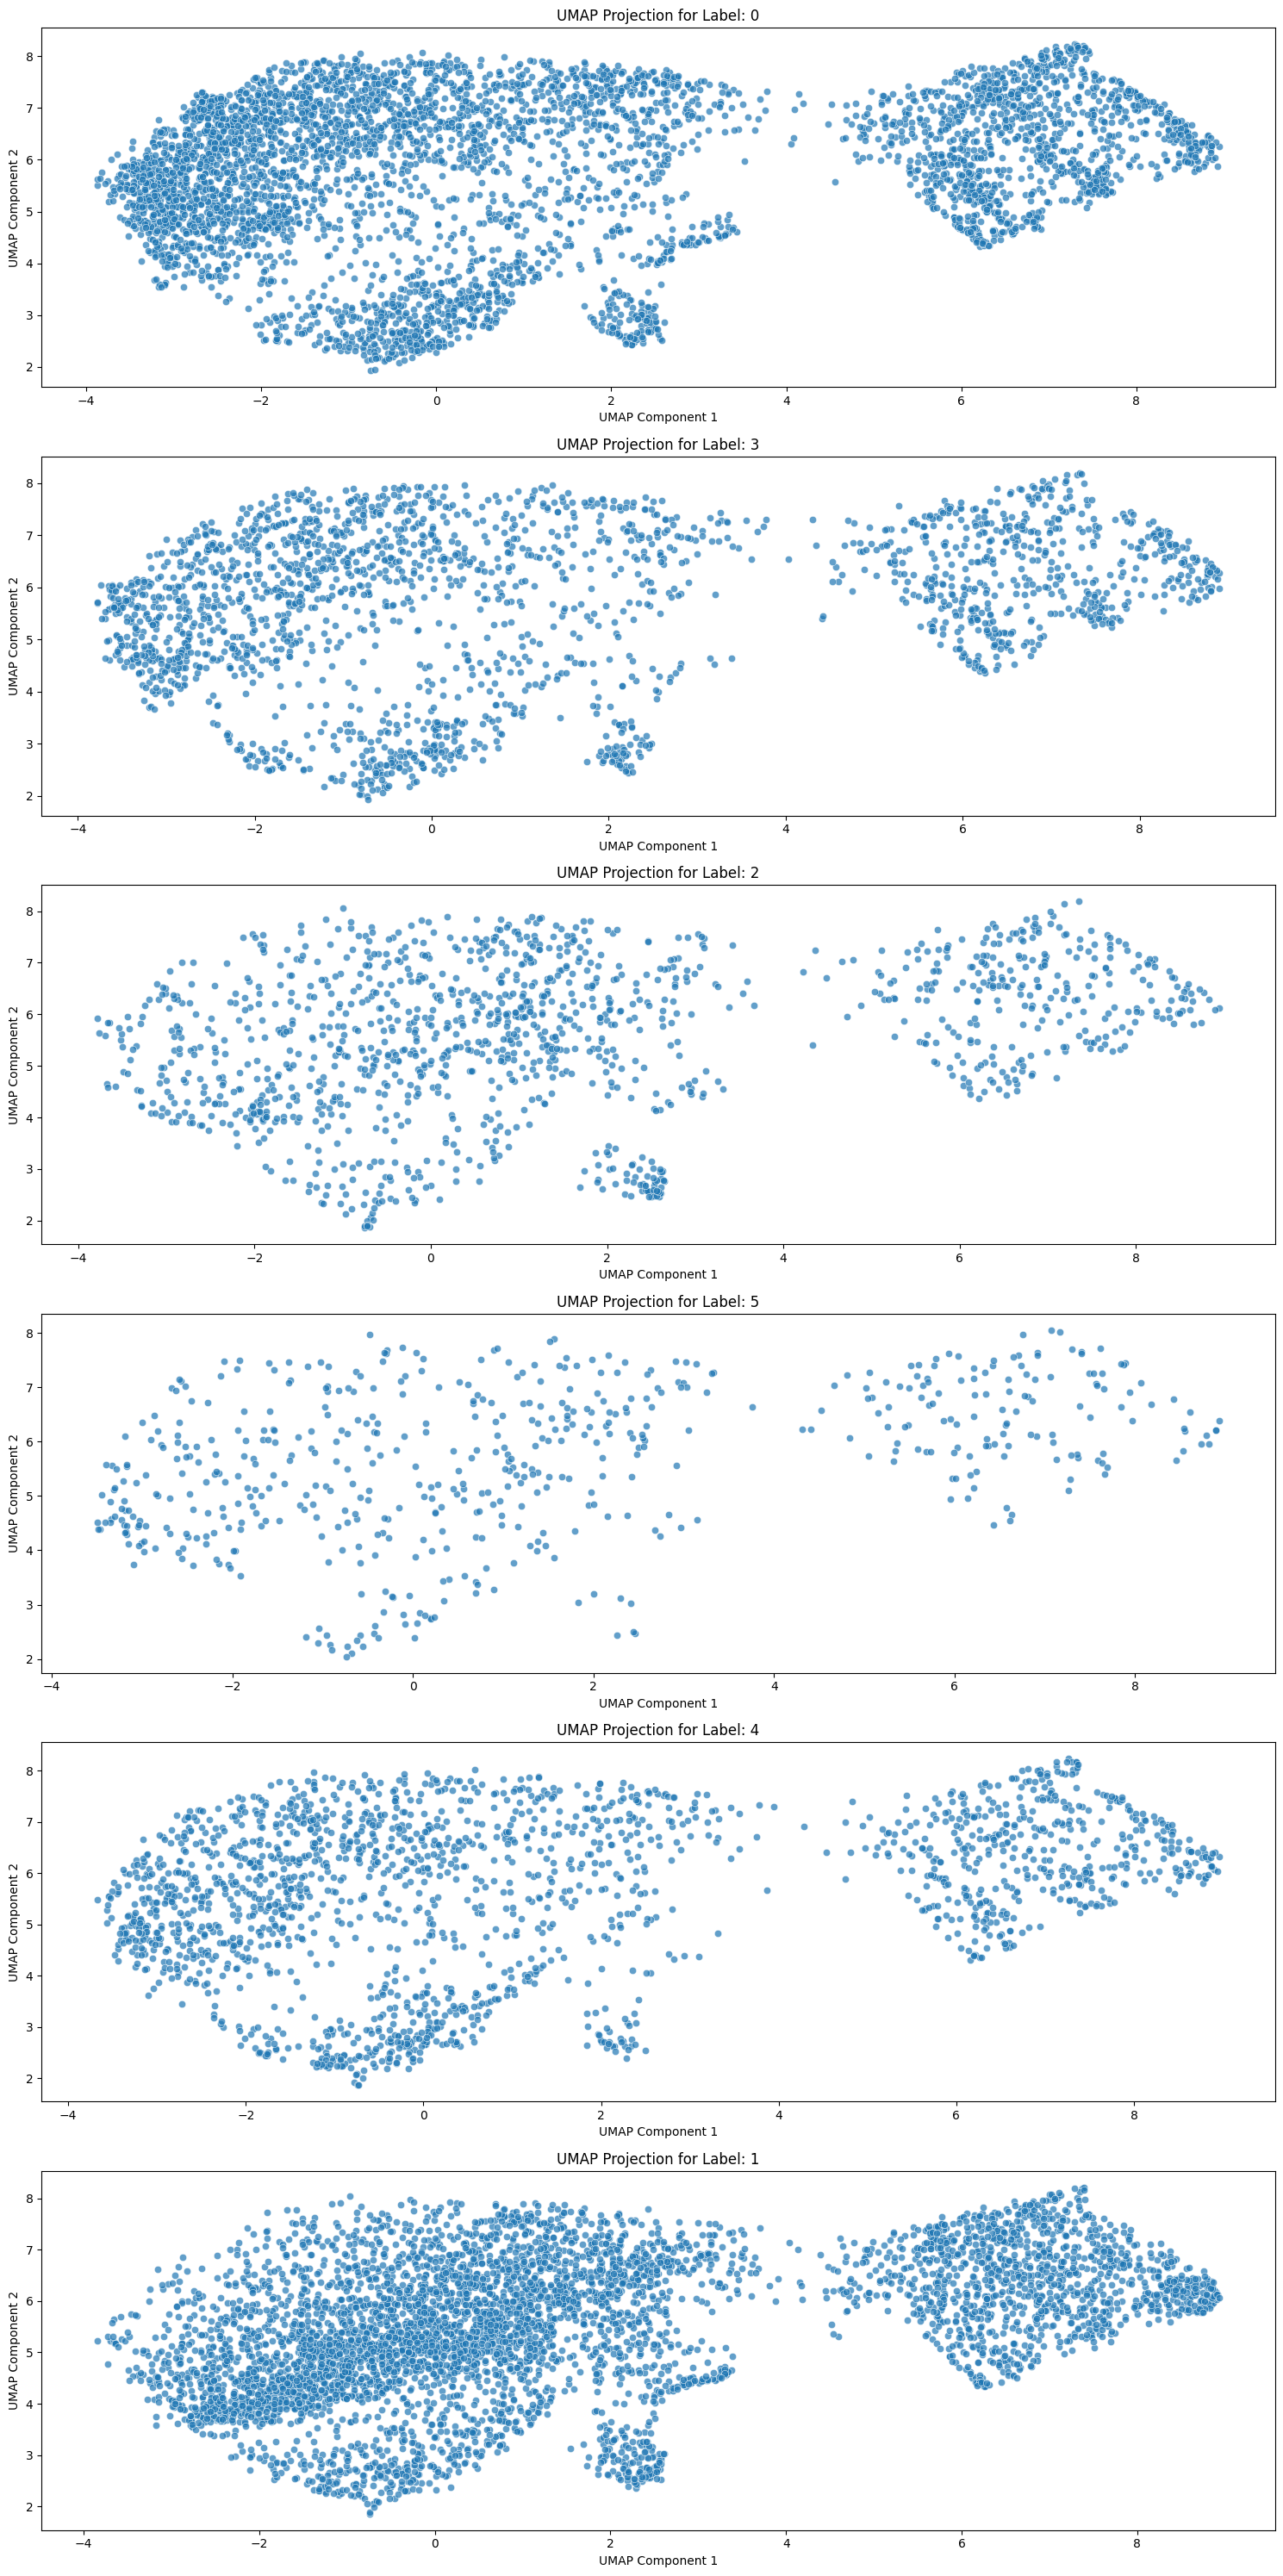

In [56]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# データの準備
x_train = np.array(emotion_hidden["train"]["hidden_state"])
y_train = np.array(emotion_hidden["train"]["label"])

# UMAPによる次元削減
umap_model = umap.UMAP(n_components=2, metric='cosine')
x_train_umap = umap_model.fit_transform(x_train)

# データフレームの作成
df_train = pd.DataFrame(x_train_umap, columns=["UMAP1", "UMAP2"])
df_train["label"] = y_train  # ラベルをデータフレームに追加

# ラベルごとにプロットを分ける
unique_labels = df_train["label"].unique()
n_labels = len(unique_labels)

# プロット
plt.figure(figsize=(15, 5 * n_labels))

for i, label in enumerate(unique_labels):
    plt.subplot(n_labels, 1, i + 1)
    subset = df_train[df_train["label"] == label]
    sns.scatterplot(x="UMAP1", y="UMAP2", data=subset, alpha=0.7)
    plt.title(f'UMAP Projection for Label: {label}')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')

plt.tight_layout()
plt.show()


In [57]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(x_train, y_train)
lr_clf.score(x_valid, y_valid)

0.633

In [62]:
from sklearn.dummy import DummyClassifier

In [63]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
dummy_clf.score(x_valid, y_valid)

0.352

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

TypeError: 1 must be a sequence

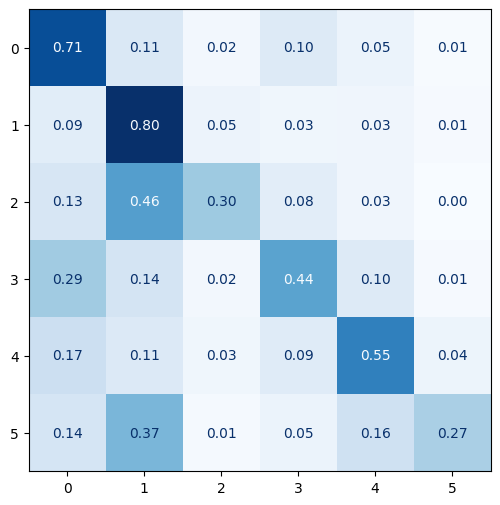

In [69]:
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()
    
y_preds = lr_clf.predict(x_valid)
plot_confusion_matrix(y_preds, y_valid, label)